In [188]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


In [3]:
observations_df = pd.read_csv('observations.csv')
observations_df

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [13]:
observations_df.nunique()

scientific_name    5541
park_name             4
observations        304
dtype: int64

In [21]:
observations_df.duplicated().value_counts()

False    23281
True        15
Name: count, dtype: int64

In [24]:
observations_df.drop_duplicates()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [41]:
park_observations = observations_df.groupby('park_name').observations.sum().reset_index()
park_observations

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


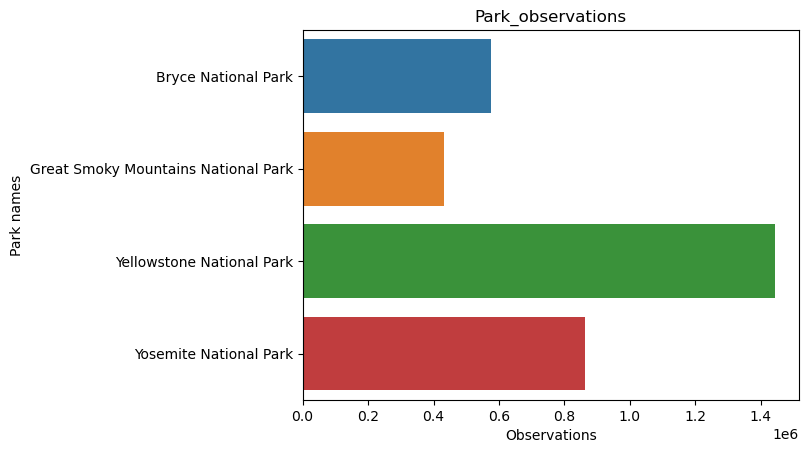

In [49]:
sns.barplot(x = 'observations', y = 'park_name', data = park_observations)
plt.title('Park_observations')
plt.ylabel("Park names")
plt.xlabel('Observations')
plt.show()

In [4]:
species_df = pd.read_csv('species_info.csv')
species_df

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [35]:
species_df.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [19]:
species_df.scientific_name.nunique()

5541

In [15]:
species_df.scientific_name.unique()

array(['Clethrionomys gapperi gapperi', 'Bos bison', 'Bos taurus', ...,
       'Parthenocissus vitacea', 'Vitis californica',
       'Tribulus terrestris'], dtype=object)

In [22]:
species_df.duplicated().value_counts()

False    5824
Name: count, dtype: int64

In [64]:
species_df.fillna('Not at risk', inplace= True)

In [65]:
merged_df = pd.merge(observations_df, species_df, on = 'scientific_name', how = 'inner')
merged_df.tail(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
25622,Ranunculus hebecarpus,Bryce National Park,108,Vascular Plant,"Delicate Buttercup, Downy-Fruit Buttercup",Not at risk
25623,Ranunculus hebecarpus,Yellowstone National Park,270,Vascular Plant,"Delicate Buttercup, Downy-Fruit Buttercup",Not at risk
25624,Gulo gulo,Great Smoky Mountains National Park,90,Mammal,Wolverine,Not at risk
25625,Gulo gulo,Bryce National Park,114,Mammal,Wolverine,Not at risk
25626,Gulo gulo,Yellowstone National Park,270,Mammal,Wolverine,Not at risk
25627,Gulo gulo,Yosemite National Park,157,Mammal,Wolverine,Not at risk
25628,Dichanthelium depauperatum,Great Smoky Mountains National Park,88,Vascular Plant,"Green Panic-Grass, Panic Grass",Not at risk
25629,Dichanthelium depauperatum,Bryce National Park,80,Vascular Plant,"Green Panic-Grass, Panic Grass",Not at risk
25630,Dichanthelium depauperatum,Yellowstone National Park,255,Vascular Plant,"Green Panic-Grass, Panic Grass",Not at risk
25631,Dichanthelium depauperatum,Yosemite National Park,162,Vascular Plant,"Green Panic-Grass, Panic Grass",Not at risk


In [66]:
species_grouped_merged = merged_df.groupby(['scientific_name', 'common_names']).sum('observations').reset_index()
species_grouped_merged

,scientific_name,common_names,observations
0,Abies bifolia,Rocky Mountain Alpine Fir,532
1,Abies concolor,"Balsam Fir, Colorado Fir, Concolor Fir, Silver...",630
2,Abies fraseri,Fraser Fir,518
3,Abietinella abietina,Abietinella Moss,592
4,Abronia ammophila,"Wyoming Sand Verbena, Yellowstone Sand Verbena",523
...,...,...,...
5817,Zonotrichia leucophrys gambelii,Gambel's White-Crowned Sparrow,560
5818,Zonotrichia leucophrys oriantha,Mountain White-Crowned Sparrow,558
5819,Zonotrichia querula,Harris's Sparrow,616
5820,Zygodon viridissimus,Zygodon Moss,600


In [92]:
merged_df.category.unique()

array(['Vascular Plant', 'Mammal', 'Bird', 'Nonvascular Plant',
       'Amphibian', 'Reptile', 'Fish'], dtype=object)

In [67]:
merged_df.conservation_status.value_counts()

conservation_status
Not at risk           24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: count, dtype: int64

In [68]:
conservation_stats = merged_df.groupby('conservation_status').common_names.nunique().reset_index()
conservation_stats

,conservation_status,common_names
0,Endangered,16
1,In Recovery,4
2,Not at risk,5324
3,Species of Concern,161
4,Threatened,10


In [103]:
Bryce_national_park = merged_df.loc[merged_df['park_name'] == 'Bryce National Park']
Yellowstone_park = merged_df.loc[merged_df['park_name'] == 'Yellowstone National Park']
Yosemite_park = merged_df.loc[merged_df['park_name'] == 'Yosemite National Park']
Great_smokey_park = merged_df[merged_df['park_name'] == 'Great Smoky Mountains National Park']

Bryce_species_frequency = Bryce_national_park.groupby(['common_names', 'category']).sum('observations').reset_index().sort_values(by= 'observations', ascending= False)
Yellowstone_species_frequency = Yellowstone_park.groupby(['common_names', 'category']).sum('observations').reset_index().sort_values(by= 'observations', ascending= False)
Yosemite_species_frequency = Yosemite_park.groupby(['common_names', 'category']).sum('observations').reset_index().sort_values(by= 'observations', ascending= False)
Great_smokey_frequency = Great_smokey_park.groupby(['common_names', 'category']).sum('observations').reset_index().sort_values(by= 'observations', ascending= False)

Bryce_category_freq = Bryce_species_frequency.groupby('category').sum('observations').reset_index().sort_values(by = 'observations', ascending=False)
Yellowstone_category_frequency = Yellowstone_species_frequency.groupby('category').sum('observations').reset_index().sort_values(by = 'observations', ascending=False)
Yosemite_category_frequency = Yosemite_species_frequency.groupby('category').sum('observations').reset_index().sort_values(by = 'observations', ascending=False)
Great_smokey_category_frequency = Great_smokey_frequency.groupby('category').sum('observations').reset_index().sort_values(by = 'observations', ascending=False)

Bryce_species_frequency[:10]

,common_names,category,observations
1729,Dicranum Moss,Nonvascular Plant,707
771,Brachythecium Moss,Nonvascular Plant,672
901,Bryum Moss,Nonvascular Plant,637
3664,Panic Grass,Vascular Plant,619
4653,Sphagnum,Nonvascular Plant,547
2672,Hypnum Moss,Nonvascular Plant,529
2668,Hygrohypnum Moss,Nonvascular Plant,521
623,Bladder Campion,Vascular Plant,425
266,Anomodon Moss,Nonvascular Plant,419
16,"A Sedge, Sedge",Vascular Plant,418


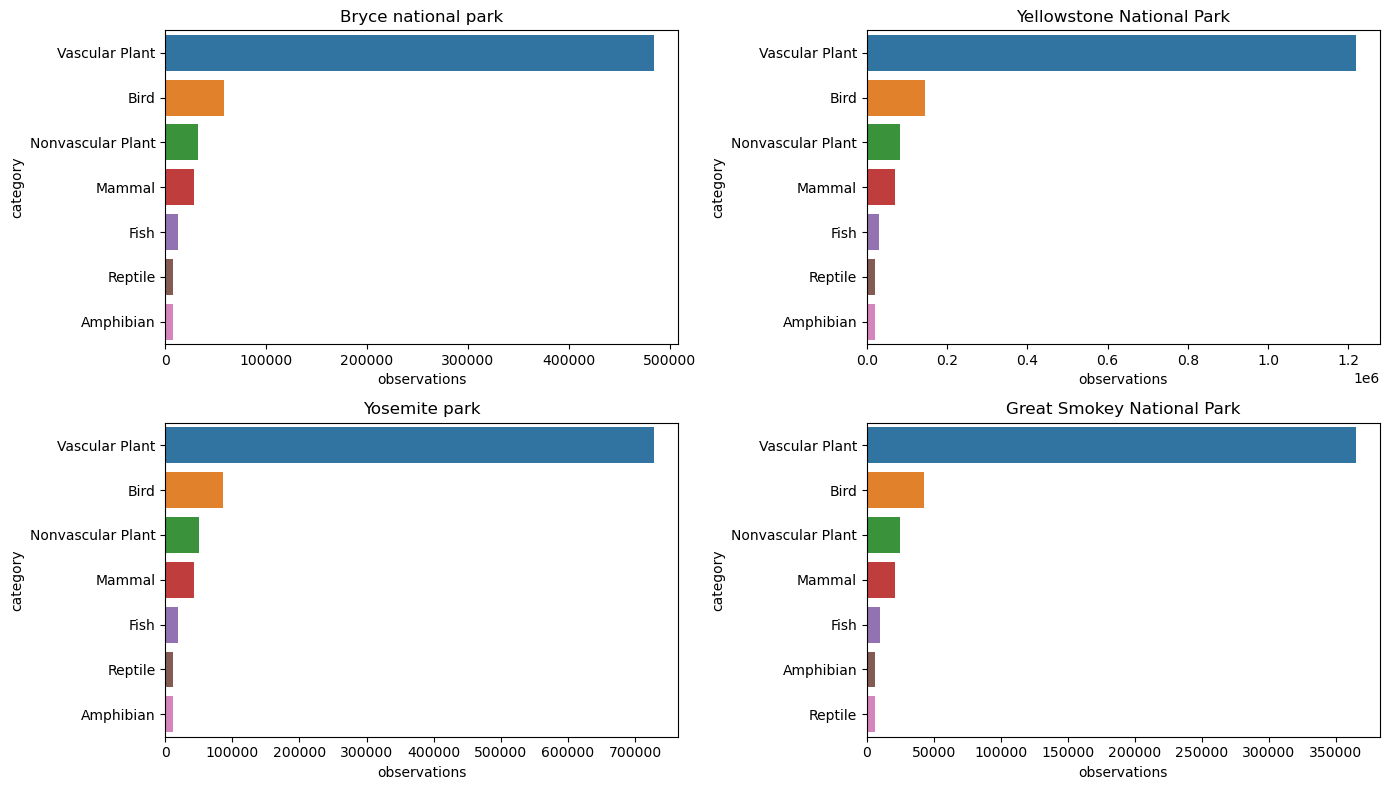

In [114]:
fig, axes = plt.subplots(2, 2, figsize = (14, 8))

sns.barplot(x = 'observations', y = 'category', data = Bryce_category_freq, ax = axes[0,0])
axes[0, 0].set_title('Bryce national park')

sns.barplot(x = 'observations', y = 'category', data = Yellowstone_category_frequency, ax =axes[0, 1])
axes[0,1].set_title("Yellowstone National Park")

sns.barplot(x = 'observations', y = 'category', data = Yosemite_category_frequency, ax =axes[1, 0])
axes[1,0].set_title('Yosemite park')

sns.barplot(x = 'observations', y = 'category', data = Great_smokey_category_frequency, ax =axes[1, 1])
axes[1, 1].set_title('Great Smokey National Park')

plt.tight_layout()

In [119]:
Protection_counts = merged_df.groupby('conservation_status').common_names.nunique().reset_index().sort_values(by = 'common_names')
Protection_counts

,conservation_status,common_names
1,In Recovery,4
4,Threatened,10
0,Endangered,16
3,Species of Concern,161
2,Not at risk,5324


Text(0.5, 0, 'conservation_status')

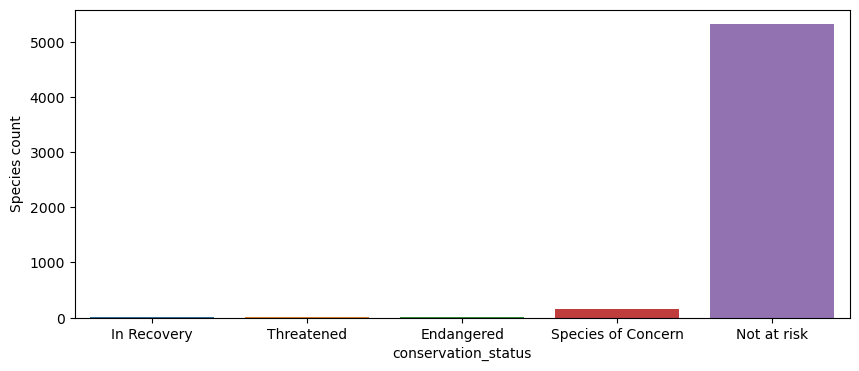

In [121]:
plt.figure(figsize=(10,4))
sns.barplot(x = 'conservation_status', y = 'common_names', data = Protection_counts)
plt.ylabel('Species count')
plt.xlabel('conservation_status')

In [153]:
endangered_species = merged_df.loc[merged_df['conservation_status'] == 'Endangered']
endangered_species_category = endangered_species.groupby('category').common_names.nunique().reset_index().sort_values(by = 'common_names' ,ascending= False)
species_of_concern = merged_df.loc[merged_df['conservation_status'] == 'Species of Concern']
species_of_concern_category = species_of_concern.groupby('category').common_names.nunique().reset_index().sort_values(by = 'common_names' ,ascending= False)
Threated_species = merged_df.loc[merged_df['conservation_status'] == 'Threatened']
Threated_species_category = Threated_species.groupby('category').common_names.nunique().reset_index().sort_values(by= 'common_names', ascending= False)
endangered_species_category
species_of_concern_category

,category,common_names
1,Bird,72
6,Vascular Plant,43
3,Mammal,28
4,Nonvascular Plant,5
5,Reptile,5
0,Amphibian,4
2,Fish,4


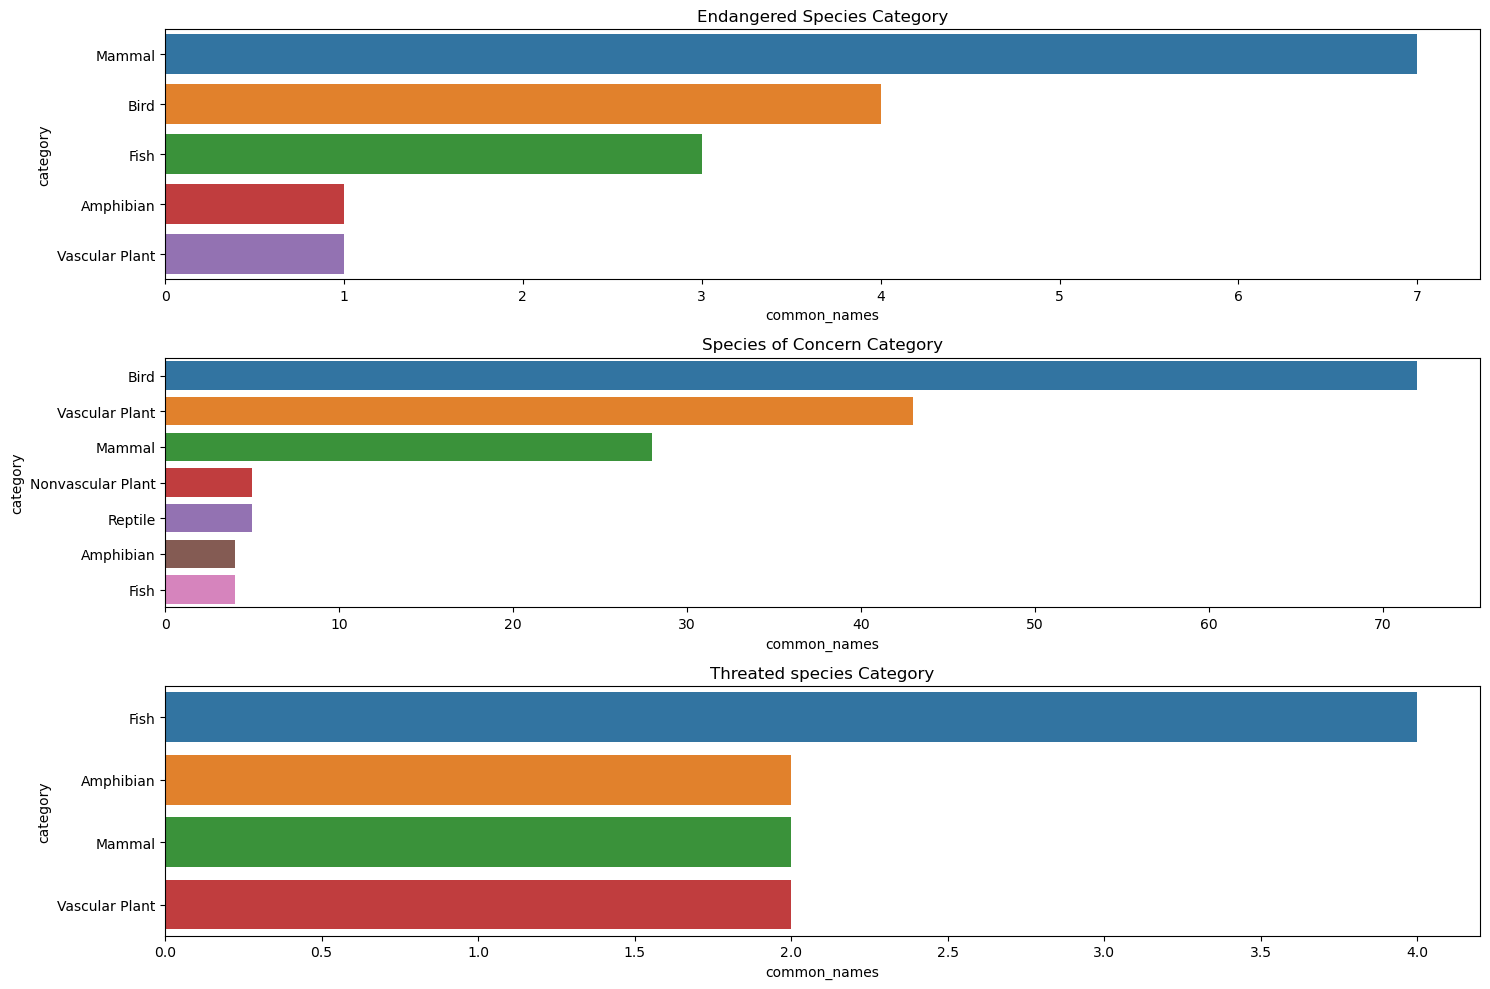

In [160]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

sns.barplot(x = 'common_names', y = 'category', data = endangered_species_category, ax = axes[0])
axes[0].set_title('Endangered Species Category')

sns.barplot(x = 'common_names', y = 'category', data = species_of_concern_category, ax = axes[1])
axes[1].set_title('Species of Concern Category')

sns.barplot(x = 'common_names', y = 'category', data = Threated_species_category, ax = axes[2])
axes[2].set_title('Threated species Category')

plt.tight_layout()

In [176]:
merged_df['Is protected'] = merged_df['conservation_status'] != 'Not at risk'

In [177]:
Protected_or_nah = merged_df.groupby(['category', 'Is protected']).common_names.nunique().reset_index()

In [178]:
Protected_not_pivot = pd.pivot(Protected_or_nah, values= 'common_names', index= 'category', columns= 'Is protected').reset_index()
Protected_not_pivot

Is protected,category,False,True
0,Amphibian,73,7
1,Bird,407,79
2,Fish,113,11
3,Mammal,168,37
4,Nonvascular Plant,242,5
5,Reptile,74,5
6,Vascular Plant,4247,46


In [187]:
Protected_not_pivot = Protected_not_pivot.rename(columns={'category': 'Category', 
                                                          False: 'Not Protected', 
                                                          True: 'Protected'})
Protected_not_pivot['Percent Protected'] = Protected_not_pivot['Protected'] / Protected_not_pivot['Not Protected']
Protected_not_pivot

Is protected,Category,Not Protected,Protected,Percent Protected
0,Amphibian,73,7,0.095890
1,Bird,407,79,0.194103
2,Fish,113,11,0.097345
3,Mammal,168,37,0.220238
4,Nonvascular Plant,242,5,0.020661
5,Reptile,74,5,0.067568
6,Vascular Plant,4247,46,0.010831


In [197]:
contingecy = [[11, 113],
              [79, 407]]

chi2, pval, dof, expected = chi2_contingency(contingecy)
print(f'chi-2: {chi2}')
print(f"pval : {pval}")
print(f"Degrees of freedom: {dof}")
print(f'Expected Frequencies: {expected}')


chi-2: 3.715994797392897
pval : 0.053893501009123074
Degrees of freedom: 1
Expected Frequencies: [[ 18.29508197 105.70491803]
 [ 71.70491803 414.29508197]]


In summary, the slightly higher p-value (0.0539) indicates that there isn't strong enough evidence to conclude a significant association between the variables, although it's very close to the typical threshold of 0.05. Thus it does not appear that there is a relationship to each other in this context.